In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Laste data fra fil i Numpy

- I denne videoen skal vi lære å laste data fra fil i numpy
- For å oppnå dette bruker vi funksjonen `np.loadtxt(file)`
- Vi vil bruke dette til å gjøre litt enkel dataanalyse i Python

## The data

- Vi har et datasett som beskriver bevegelsen til et prosjektil med tid
- Det består av fem kolonner: __time, x, y, v_x, v_y__ hvor time beskriver tid i sekunder, x og y er x og y posisjon i meter og v_x og v_y er fart i x og y-retning målt i m/s
- Vi vil analysere denne dataen ved å plotte prosjektilets bane og se hvordan farten utvikler seg med tiden
- Dataen vår ser slik ut:

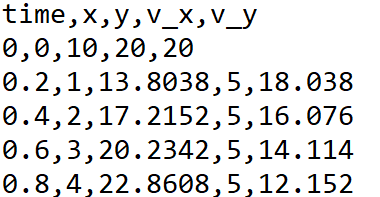

## np.loadtxt
- `loadtxt`er numpy's metode for å lese data inn fra tekstfiler
- Den tar som input den relative pathen til filen du ønsker å lese fra
- Og returnerer et 2D numpy-array hvor hver rad i tekstfilen blir et array
- Det finnes også valgfrie inputs man kan gi funksjonen. Noen av de vi skal bruke:
- dtype: spesifiserer datatypen på arrayen som returneres
- delimiter: spesifiserer skilletegnet brukt når dataen lagres. I vårt tilfelle er det `,`
- encoding: spesifiserer karakterencoding som dataen er lagret med. I vårt tilfelle er det: `utf-8-sig`. Det kan ofte være andre tegnsystemer som `ascii`, `utf-8`, `utf-16`


In [2]:
# her laster vi dataen
# dtype=str sier at vi skal lese dataen som streng
# delimiter="," sier at skilletegnet i dataen er ,
# og tilslutt spesifiserer encoding at dataen er lagret i utf-8-sig format
data = np.loadtxt("prosjektil.txt", dtype=str, delimiter=",", encoding='utf-8-sig')

In [3]:
# sånn ser dataen ut
data

array([['time', 'x', 'y', 'v_x', 'v_y'],
       ['0', '0', '10', '20', '20'],
       ['0.2', '1', '13.8038', '20', '18.038'],
       ['0.4', '2', '17.2152', '20', '16.076'],
       ['0.6', '3', '20.2342', '20', '14.114'],
       ['0.8', '4', '22.8608', '20', '12.152'],
       ['1', '5', '25.095', '20', '10.19'],
       ['1.2', '6', '26.9368', '20', '8.228'],
       ['1.4', '7', '28.3862', '20', '6.266'],
       ['1.6', '8', '29.4432', '20', '4.304'],
       ['1.8', '9', '30.1078', '20', '2.342'],
       ['2', '10', '30.38', '20', '0.38'],
       ['2.2', '11', '30.2598', '20', '-1.582'],
       ['2.4', '12', '29.7472', '20', '-3.544'],
       ['2.6', '13', '28.8422', '20', '-5.506'],
       ['2.8', '14', '27.5448', '20', '-7.468'],
       ['3', '15', '25.855', '20', '-9.43'],
       ['3.2', '16', '23.7728', '20', '-11.392'],
       ['3.4', '17', '21.2982', '20', '-13.354'],
       ['3.6', '18', '18.4312', '20', '-15.316'],
       ['3.8', '19', '15.1718', '20', '-17.278'],
       ['4', '

## Databehandling
- Som vi observerte på forrige slide er ikke dataen helt riktig formattert
- Vi vil heller lagre kolonnenavnene som en rad i en dictionary og kolonneverdiene som verdi i form av et array
- Dette løser vi under

In [4]:
# tar første rad og lagrer i en array kalt keys
keys = data[0,:]
# tar resten av radene og larger i en array kalt values
# vi konverterer også denne dataen til float
values = data[1:,:].astype(float)

In [5]:
data_dict = {keys[i]:values[:,i] for i in range(len(keys))}
data_dict

{'time': array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
        2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6]),
 'x': array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23.]),
 'y': array([10.    , 13.8038, 17.2152, 20.2342, 22.8608, 25.095 , 26.9368,
        28.3862, 29.4432, 30.1078, 30.38  , 30.2598, 29.7472, 28.8422,
        27.5448, 25.855 , 23.7728, 21.2982, 18.4312, 15.1718, 11.52  ,
         7.4758,  3.0392, -1.7898]),
 'v_x': array([20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.,
        20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.]),
 'v_y': array([ 20.   ,  18.038,  16.076,  14.114,  12.152,  10.19 ,   8.228,
          6.266,   4.304,   2.342,   0.38 ,  -1.582,  -3.544,  -5.506,
         -7.468,  -9.43 , -11.392, -13.354, -15.316, -17.278, -19.24 ,
        -21.202, -23.164, -25.126])}

## Plotte projsketilbane

- Nå kan vi endelig starte våre analyser
- Først ønsker vi å plotte banen til prosjektilet:


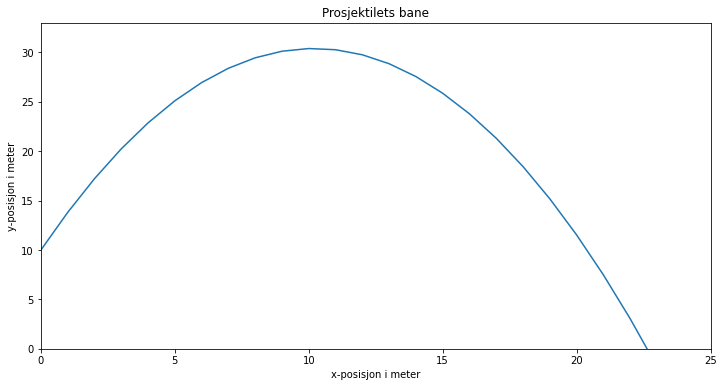

In [6]:
# lager en figur og setter størrelse
plt.figure(figsize=(12,6))
plt.plot(data_dict.get("x"), data_dict.get("y")) # plotter x og y posisjon som et linjeplot

# formattering og titler
plt.title("Prosjektilets bane")
plt.xlabel("x-posisjon i meter")
plt.ylabel("y-posisjon i meter")
plt.xlim(0,25)
plt.ylim(0,33)
plt.show()

## Fartsutvikling
- Vi har også lyst til å se hvordan farten i x- og y-retning utvikler seg med tiden
- vi plotter begge kurvene i samme plott

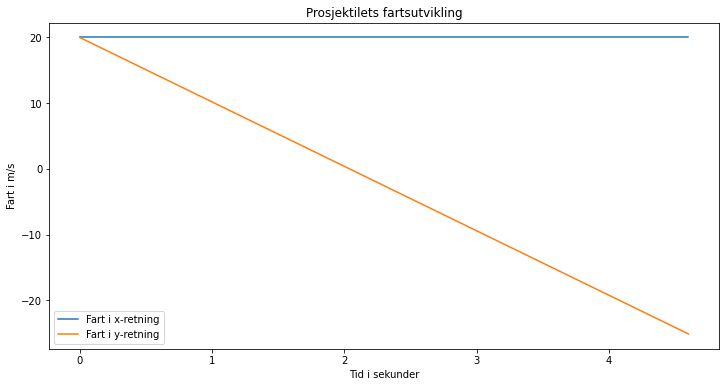

In [7]:
# lager en figur og setter størrelse
plt.figure(figsize=(12,6))

# plotter først farten i x-retning
plt.plot(data_dict.get("time"), data_dict.get("v_x"), label="Fart i x-retning")
# plotter så farten i y-retning
plt.plot(data_dict.get("time"), data_dict.get("v_y"), label="Fart i y-retning")

# aksetitler og legend
plt.title("Prosjektilets fartsutvikling")
plt.xlabel("Tid i sekunder")
plt.ylabel("Fart i m/s")
plt.legend() # vise legend
plt.show()

## Neste steg

- I denne videoen lærte vi hvordan vi kan bruke numpy til å laste data inn fra fil
- Dette fungerer fint, men krever litt databehandling
- Senere i studiet vil du nok lære om Pandas som er en mer effektiv måte å gjøre dette på
- Se også notebook X for et mer detaljert eksempel hvor vi studerer været i Trondheim